In [2]:
import pandas as pd

In [1]:


# 原文件、未进行处理
try:
    df = pd.read_csv('绍兴市居民出行调查－答卷汇总.csv', encoding='utf-8')
    print('utf-8')
except UnicodeDecodeError:
    try:
        df = pd.read_csv('绍兴市居民出行调查－答卷汇总.csv', encoding='GBK')   # 使用编码GBK
    except UnicodeDecodeError:
        df = pd.read_csv('绍兴市居民出行调查－答卷汇总.csv', encoding='latin1')

# 获取行数
num_rows = df.shape[0]

print(f"CSV文件的行数为: {num_rows}")


CSV文件的行数为: 18392


In [2]:
print("列名：", df.columns)

列名： Index(['序号', '提交答卷时间', '所用时间', '来自IP', '来源渠道', '第1题(1)', '第1题(2)', '第2题(1)',
       '第3题(1)', '第3题(2)',
       ...
       '第62题(3)', '第62题(4)', '第62题(5)', '第62题(6)', '第63题(1)', '第63题(2)',
       '第63题(3)', '第63题(4)', '第63题(5)', '第63题(6)'],
      dtype='object', length=488)


In [3]:
df = pd.read_csv('绍兴市居民出行调查－答卷汇总.csv', encoding='GBK',dtype={'所用时间': str})
df['所用时间'] = df['所用时间'].str.replace('秒', '').astype(int)

# 将修改后的数据保存到原始CSV文件中，覆盖原始数据
df.to_csv('绍兴市居民出行调查－答卷汇总.csv', index=False)

In [9]:
# 去除填写时间小于90s
# 删除 "所用时间" 列中值小于90秒的行
df_filtered = df[df['所用时间'] >= 90]

# 保存过滤后的数据到一个新的CSV文件
df_filtered.to_csv('filtered_file1.csv', index=False)
num_rows2 = df_filtered.shape[0]
print(f"CSV文件的行数为: {num_rows2}")
print("已删除'所用时间'小于90秒的行，并保存到 filtered_file1.csv")
####

CSV文件的行数为: 17438
已删除'所用时间'小于90秒的行，并保存到 filtered_file1.csv


In [5]:
# 去除小区编号空白
df_filtered = pd.read_csv('filtered_file1.csv')

df_filtered2 = df_filtered[df_filtered['第2题(1)'] != '(空)']
df_filtered2.to_csv('filtered_file2.csv', index=False)
num_rows = df_filtered2.shape[0]
print(f"CSV文件的行数为: {num_rows}")


CSV文件的行数为: 13863


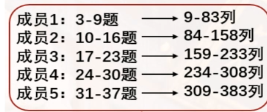

In [6]:
# 处理成员一空值
import pandas as pd

# 读取CSV文件
file_path = 'filtered_file2.csv'  # 替换为你的CSV文件路径
df = pd.read_csv(file_path)

# 获取第九列到第十二列的列名（索引从0开始，所以第九列是索引8）
columns = df.columns[8:12]

# 遍历这些列，将值为字符‘空’的单元格替换为整数0
for col in columns:
    df[col] = df[col].replace('空', 0)
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)


df.to_csv(file_path, index=False)

# 打印替换后的数据以验证修改
print("替换后的第九列到第十二列数据:")
print(df[columns])




替换后的第九列到第十二列数据:
       第3题(1)  第3题(2)  第3题(3)  第3题(4)
0           1      65       2       3
1           1      40       3       6
2           1      40       3       6
3           1      39       4       3
4           1      62       1       3
...       ...     ...     ...     ...
13858       2       0       3       4
13859       1      42       2       2
13860       1      41       2       0
13861       1      48       3       5
13862       1      27       4       5

[13863 rows x 4 columns]


In [18]:
# 检查成员一性别代码  
# 该列的值应为 1 或 2 若非这两个值，则替换为 0
file_path = 'filtered_file2.csv'  # 替换为你的CSV文件路径
df = pd.read_csv(file_path)

column = df.columns[8]
print(column)

df[column] = df[column].apply(lambda x: x if x in [1, 2] else 0)

print(df[column])
df.to_csv(file_path, index=False)



第3题(1)
0        1
1        1
2        1
3        1
4        1
        ..
13858    2
13859    1
13860    1
13861    1
13862    1
Name: 第3题(1), Length: 13863, dtype: int64


In [12]:
# 处理成员二空值
import pandas as pd

# 读取CSV文件
file_path = 'filtered_file2.csv'  # 替换为你的CSV文件路径
df = pd.read_csv(file_path)

# 83 84 85 86
columns = df.columns[83:87]

for col in columns:
    print(col)

# 遍历这些列，将值为字符‘空’的单元格替换为整数0
for col in columns:
    df[col] = df[col].replace('空', 0)
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)


df.to_csv(file_path, index=False)

# 打印替换后的数据以验证修改
print("替换后的第九列到第十二列数据:")
print(df[columns])

第10题(1)
第10题(2)
第10题(3)
第10题(4)
替换后的第九列到第十二列数据:
       第10题(1)  第10题(2)  第10题(3)  第10题(4)
0            0        0        0        0
1            2       38        3        4
2            2       38        3        4
3            2       39        4        3
4            2       63        1        3
...        ...      ...      ...      ...
13858        1        0        4        5
13859        2       37        2        3
13860        1       18        1        1
13861        2       41        3        3
13862        2       34        4        4

[13863 rows x 4 columns]


In [20]:
# 检查成员二性别代码  
# 该列的值应为 1 或 2 若非这两个值，则替换为 0
file_path = 'filtered_file2.csv'  # 替换为你的CSV文件路径
df = pd.read_csv(file_path)

column = df.columns[83]
print(column)

df[column] = df[column].apply(lambda x: x if x in [1, 2] else 0)

print(df[column])
df.to_csv(file_path, index=False)


第10题(1)
0        0
1        2
2        2
3        2
4        2
        ..
13858    1
13859    2
13860    1
13861    2
13862    2
Name: 第10题(1), Length: 13863, dtype: int64


In [10]:
# 处理成员三空值
# 读取CSV文件
file_path = 'filtered_file2.csv'  # 替换为你的CSV文件路径
df = pd.read_csv(file_path)

# 159 160 161 162
columns = df.columns[158:162]
# 打印列名
for col in columns:
    print(col)

# 遍历这些列，将值为字符‘空’的单元格替换为整数0
for col in columns:
    df[col] = df[col].replace('空', 0)
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)


df.to_csv(file_path, index=False)

# 打印替换后的数据以验证修改
print(df[columns])


第17题(1)
第17题(2)
第17题(3)
第17题(4)
       第17题(1)  第17题(2)  第17题(3)  第17题(4)
0            0        0        0        0
1            2       13        2        1
2            2       13        2        1
3            2       12        2        1
4            0        0        0        0
...        ...      ...      ...      ...
13858        0        0        0        0
13859        2       14        2        0
13860        2       42        0        0
13861        2       19        4        3
13862        0        0        0        0

[13863 rows x 4 columns]


In [21]:
# 检查成员三性别代码  
# 该列的值应为 1 或 2 若非这两个值，则替换为 0
file_path = 'filtered_file2.csv'  # 替换为你的CSV文件路径
df = pd.read_csv(file_path)

column = df.columns[158]
print(column)

df[column] = df[column].apply(lambda x: x if x in [1, 2] else 0)

print(df[column])
df.to_csv(file_path, index=False)

第17题(1)
0        0
1        2
2        2
3        2
4        0
        ..
13858    0
13859    2
13860    2
13861    2
13862    0
Name: 第17题(1), Length: 13863, dtype: int64


In [11]:
# 处理成员四空值
# 读取CSV文件
file_path = 'filtered_file2.csv'  # 替换为你的CSV文件路径
df = pd.read_csv(file_path)

# 234 235 236 237
columns = df.columns[233:237]
# 打印列名
for col in columns:
    print(col)

# 遍历这些列，将值为字符‘空’的单元格替换为整数0
for col in columns:
    df[col] = df[col].replace('空', 0)
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)


df.to_csv(file_path, index=False)

# 打印替换后的数据以验证修改
print("替换后的:")
print(df[columns])


第24题(1)
第24题(2)
第24题(3)
第24题(4)
替换后的:
       第24题(1)  第24题(2)  第24题(3)  第24题(4)
0            0        0        0        0
1            0        0        0        0
2            0        0        0        0
3            0        0        0        0
4            0        0        0        0
...        ...      ...      ...      ...
13858        0        0        0        0
13859        0        0        0        0
13860        2       14        0        0
13861        2       13        2        1
13862        0        0        0        0

[13863 rows x 4 columns]


In [22]:
# 检查成员四性别代码  
# 该列的值应为 1 或 2 若非这两个值，则替换为 0
file_path = 'filtered_file2.csv'  # 替换为你的CSV文件路径
df = pd.read_csv(file_path)

column = df.columns[233]
print(column)

df[column] = df[column].apply(lambda x: x if x in [1, 2] else 0)

print(df[column])
df.to_csv(file_path, index=False)

第24题(1)
0        0
1        0
2        0
3        0
4        0
        ..
13858    0
13859    0
13860    2
13861    2
13862    0
Name: 第24题(1), Length: 13863, dtype: int64


In [13]:
# 处理成员五空值
file_path = 'filtered_file2.csv'  # 替换为你的CSV文件路径
df = pd.read_csv(file_path)

# 309 310 311 312
columns = df.columns[308:312]
# 打印列名
for col in columns:
    print(col)

# 遍历这些列，将值为字符‘空’的单元格替换为整数0
for col in columns:
    df[col] = df[col].replace('空', 0)
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)


df.to_csv(file_path, index=False)

# 打印替换后的数据以验证修改
print("替换后的:")
print(df[columns])

第31题(1)
第31题(2)
第31题(3)
第31题(4)
替换后的:
       第31题(1)  第31题(2)  第31题(3)  第31题(4)
0            0        0        0        0
1            0        0        0        0
2            0        0        0        0
3            0        0        0        0
4            0        0        0        0
...        ...      ...      ...      ...
13858        0        0        0        0
13859        0        0        0        0
13860        0        0        0        0
13861        0        0        0        0
13862        0        0        0        0

[13863 rows x 4 columns]


In [23]:
# 检查成员五性别代码  
# 该列的值应为 1 或 2 若非这两个值，则替换为 0
file_path = 'filtered_file2.csv'  # 替换为你的CSV文件路径
df = pd.read_csv(file_path)

column = df.columns[308]
print(column)

df[column] = df[column].apply(lambda x: x if x in [1, 2] else 0)

print(df[column])
df.to_csv(file_path, index=False)

第31题(1)
0        0
1        0
2        0
3        0
4        0
        ..
13858    0
13859    0
13860    0
13861    0
13862    0
Name: 第31题(1), Length: 13863, dtype: int64
